In [1]:
import lib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X_val, y_val, X_test, y_test = lib.load_dataset("../dataset")

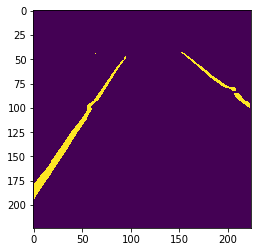

In [4]:
plt.imshow(lib.cluster_filter(X_val[400]))

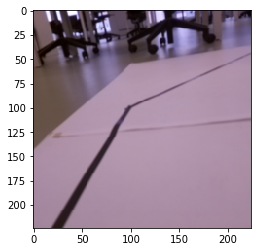

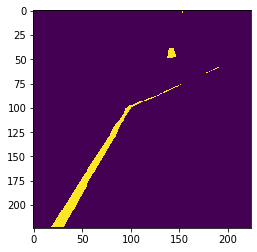

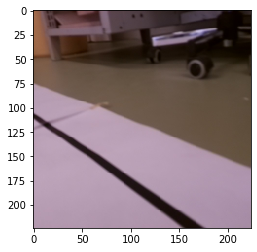

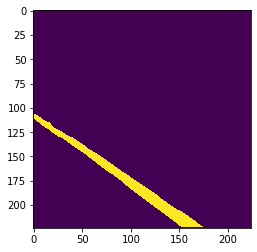

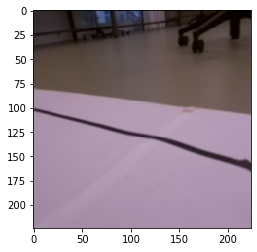

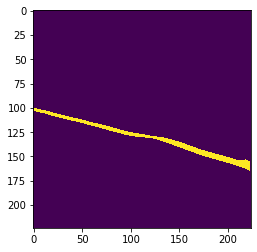

In [5]:
for img in X_val[300:303]:
    plt.figure()
    plt.imshow(img)
    plt.figure()
    plt.imshow(lib.cluster_filter(img))

In [6]:
def plot_remove_clusters(images, columns, max_size):
    count = len(images)

    plt.figure(figsize=(4 * columns, 4 * count/columns))

    for i in range(count):
        image = images[i]
        image = lib.cluster_filter(image)
        plt.subplot(count / columns + 1, columns, i + 1)
        plt.imshow(image)

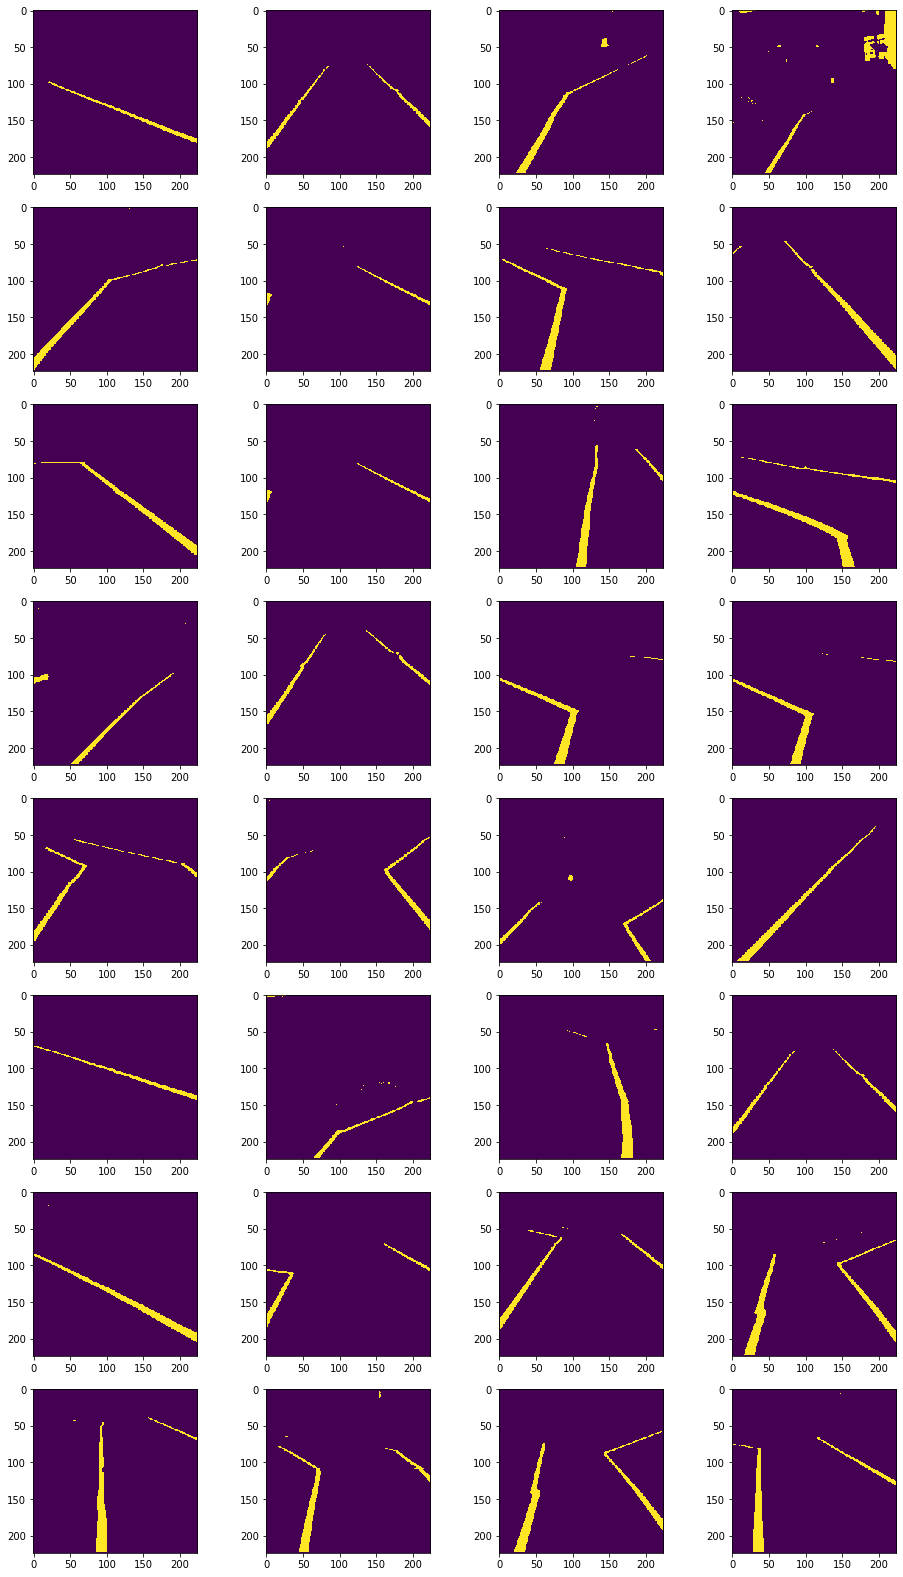

In [7]:
offset = 600
count = 32
plot_remove_clusters(X_val[offset:offset+count], 4, 2000)

In [8]:
class PixelClustersEstimator(lib.Estimator):
    def __init__(self, limit=2000):
        self.limit = limit
            
    def predict_one(self, img):
        img = lib.cluster_filter(img)

        lines = lib.detect_lines(img.astype(np.uint8))
        
        return lib.angle_from_lines(lines, False)

In [9]:
estimator = PixelClustersEstimator()

In [10]:
estimator.score(X_val[300:350], y_val[300:350])

(0.33722670076915934, 0.3877448515460219)

In [11]:
def draw(img, max_size=2000):
    res = lib.cluster_filter(img)
    
    lines = lib.detect_lines(res.astype(np.uint8))
    
    plt.imshow(lib.draw_lines(res, lines))

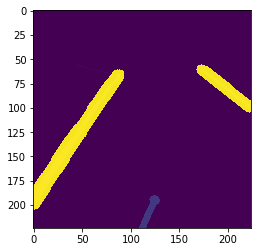

In [12]:
import math

draw(X_val[520])

In [34]:
import importlib
importlib.reload(lib)

<module 'lib' from '/home/sfluor/projects/cs-isia-racer/notebooks/src/lib.py'>

In [28]:
Xc_val, yc_val, Xc_test, yc_test = lib.load_dataset("../dataset_clusterified")

In [29]:
import cv2

class RawEstimator(lib.Estimator):
    def __init__(self, weighted, reduction):
        self.weighted = weighted
        self.reduction = reduction

    def predict_one(self, img):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        lines = lib.detect_lines(gray.astype(np.uint8))
        
        return lib.angle_from_lines(lines, self.weighted, reduction=self.reduction)

In [30]:
RawEstimator(True, np.mean).score(Xc_val, yc_val)

(0.4066073292157201, 0.5388023616932661)

In [31]:
RawEstimator(False, np.max).score(Xc_val, yc_val)

(0.4094301668589518, 0.5400412335885592)

In [35]:
def maxabs(x):
    mi = np.min(x)
    ma = np.max(x)
    
    if abs(ma) > abs(mi):
        return ma
    
    return mi

In [36]:
for weighted in [False, True]:
    for reduction in [
        np.mean,
        maxabs,
    ]:
        score = RawEstimator(weighted, reduction).score(Xc_val, yc_val)
        print(f"score: {score} weighted: {weighted}, reduction: {reduction}")

score: (0.4094301668589518, 0.5400412335885592) weighted: False, reduction: <function mean at 0x7f491c023ef0>
score: (0.4189458215978799, 0.5482930275487115) weighted: False, reduction: <function maxabs at 0x7f48c3b5d8c0>
score: (0.4905764190150883, 0.5882438305231902) weighted: False, reduction: <function <lambda> at 0x7f48c3affdd0>
score: (0.4920492613251294, 0.5882610114836975) weighted: False, reduction: <function <lambda> at 0x7f48c3affcb0>
score: (0.4066073292157201, 0.5388023616932661) weighted: True, reduction: <function mean at 0x7f491c023ef0>
score: (0.3628844092382343, 0.5142721901191757) weighted: True, reduction: <function maxabs at 0x7f48c3b5d8c0>
score: (0.4902776992066145, 0.5881796626916989) weighted: True, reduction: <function <lambda> at 0x7f48c3affdd0>
score: (0.4891211302306176, 0.587507143701028) weighted: True, reduction: <function <lambda> at 0x7f48c3affd40>


In [ ]:
maxabs(np.array([1, 2, -5, 4]))

In [ ]:
np.mean(np.array([1, 2, -5, 4]))